# OpenMASTER - Scenario Discovery - Figures

-------------------------

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.ensemble import GradientBoostingClassifier
import os

#Read results
#df=pd.read_csv("..\data\output\scenarios_results_full.csv", delimiter=';')
df=pd.read_excel("..\data\output\scenarios_results_full.xlsx")

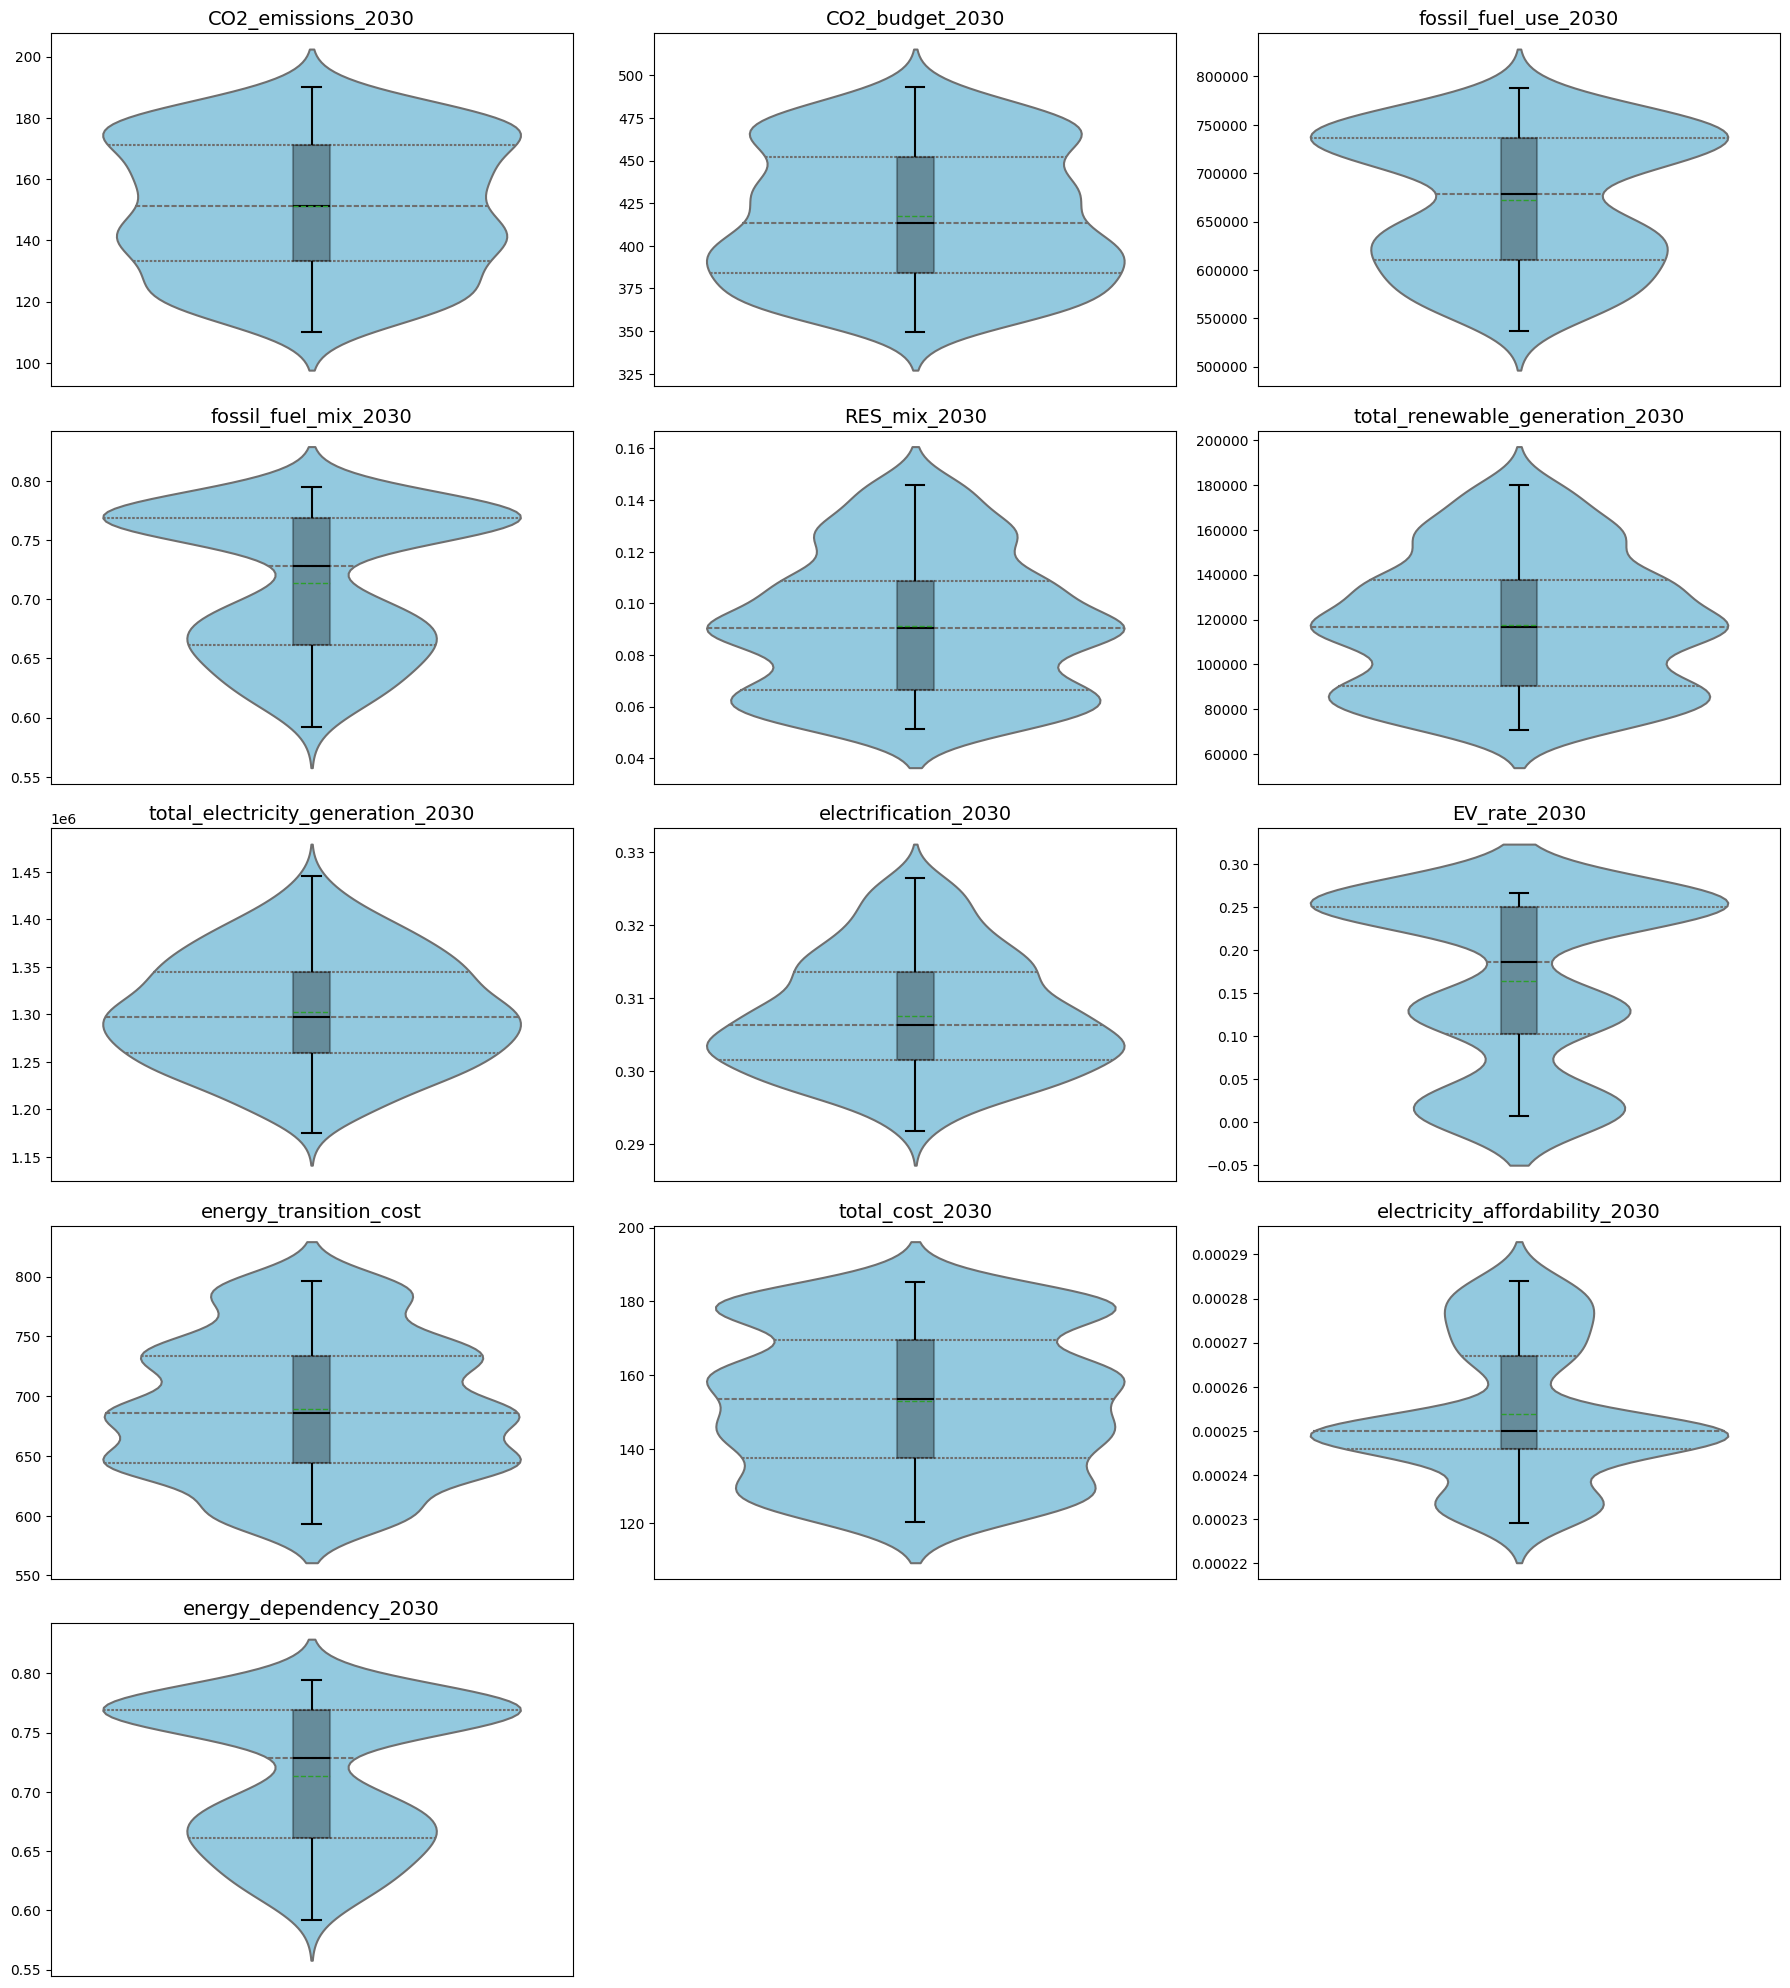

In [5]:
#Violin-boxplots figures

# Define metrics to plot
metrics = ['CO2_emissions_2030', 'CO2_budget_2030', 'fossil_fuel_use_2030', 'fossil_fuel_mix_2030',
           'RES_mix_2030', 'total_renewable_generation_2030', 'total_electricity_generation_2030',
           'electrification_2030', 'EV_rate_2030', 'energy_transition_cost', 'total_cost_2030',
           'electricity_affordability_2030', 'energy_dependency_2030']

# Calculate total number of metrics
num_metrics = len(metrics)

# Calculate number of rows and columns for subplots
num_cols = 3
num_rows = (num_metrics + num_cols - 1) // num_cols  # Calculation of rows rounded up

# Create figure and axes using subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 4 * num_rows), sharex=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Generate violin plots with nested boxplot for each metric
for idx, metric in enumerate(metrics):
    # Violin plot with quartile inner and specific line width
    sns.violinplot(y=df[metric], ax=axes[idx], inner='quartile', linewidth=1.5, width=0.8, color='skyblue')
    
    # Boxplot with black color, narrow width, and mean indicators
    sns.boxplot(y=df[metric], ax=axes[idx], width=0.07, linewidth=1.5, color='black', showmeans=True, meanline=True,
                boxprops=dict(alpha=0.3))
    
    # Set title for each subplot with metric name
    axes[idx].set_title(metric, fontsize=14)
    
    # Remove y-axis label to avoid redundancy
    axes[idx].set_ylabel('')
    
    # Hide x-axis ticks, labels, and grid lines
    axes[idx].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Remove unused axes if there are more subplots than metrics
for i in range(num_metrics, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots and display the figure
plt.tight_layout()
plt.show()

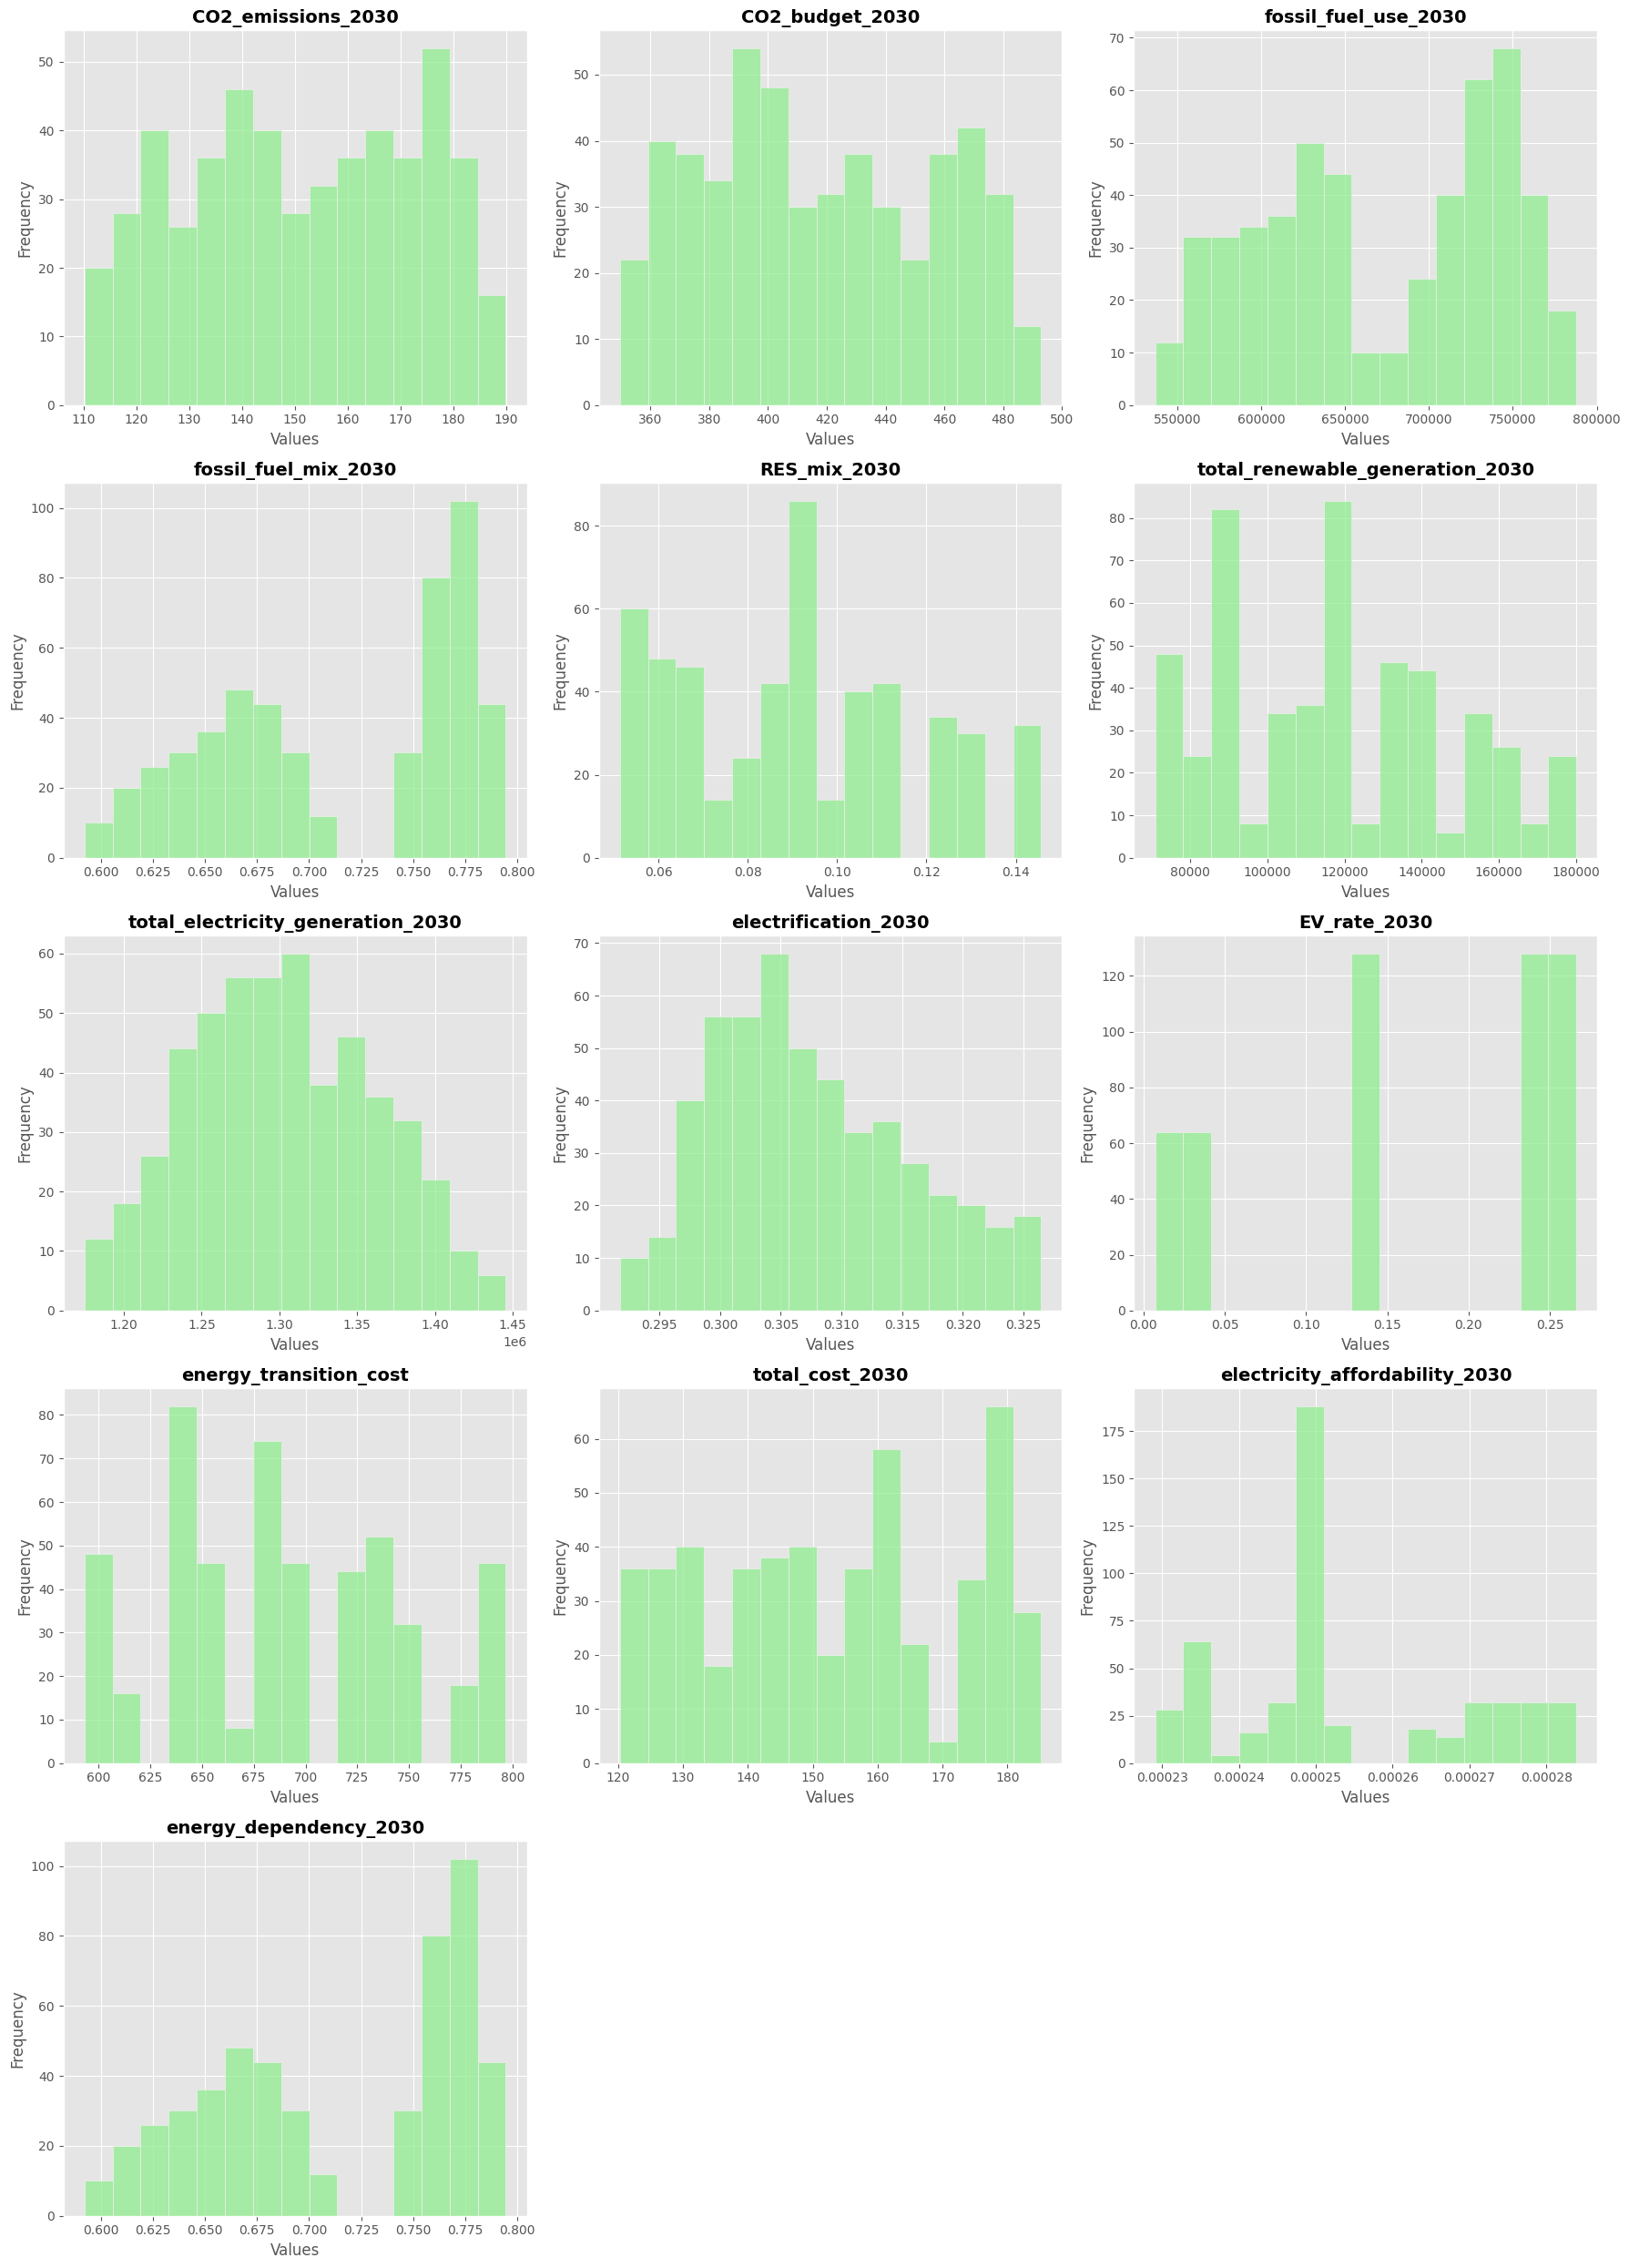

In [6]:
#Histograms

# List of variables to plot
variables = [
    'CO2_emissions_2030', 'CO2_budget_2030', 'fossil_fuel_use_2030', 'fossil_fuel_mix_2030',
    'RES_mix_2030', 'total_renewable_generation_2030', 'total_electricity_generation_2030',
    'electrification_2030', 'EV_rate_2030', 'energy_transition_cost', 'total_cost_2030',
    'electricity_affordability_2030', 'energy_dependency_2030'
]

# Number of plots
n_vars = len(variables)

# Configure the figure size and style
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 25))
axes = axes.flatten()

# Generate histograms for each variable
for i, var in enumerate(variables):
    sns.histplot(df[var], bins=15, kde=False, color='lightgreen', ax=axes[i])
    axes[i].set_title(var, fontsize=14, weight='bold')
    axes[i].set_xlabel("Values", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots
for j in range(n_vars, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

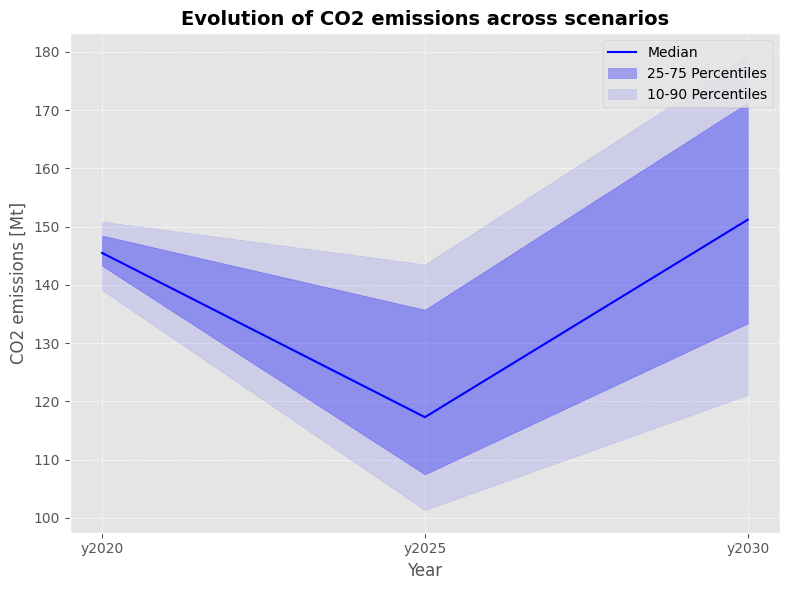

In [7]:
#Evolution of CO2 emissions across scenarios

# Initialize list to store data
data = []

# Directory containing the CSV files
base_dir = r'..\data\tmp\output'

# Loop through each scenario folder
for i in range(512):
    scenario_dir = os.path.join(base_dir, str(i))
    file_path = os.path.join(scenario_dir, 'vEmiCO2Tot.csv')
    
    # Check if the file exists before reading
    if os.path.exists(file_path):
        df_co2 = pd.read_csv(file_path)
        data.append(df_co2)
    else:
        print(f"Warning: File not found for scenario {i}")

# Concatenate all data into a single DataFrame
if data:
    all_data = pd.concat(data, keys=range(512), names=['Scenario', 'Index'])

    # Pivot table to organize data by year
    pivot_data = all_data.reset_index().pivot(index='Scenario', columns='sYear', values='vEmiCO2Tot')

    # Calculate statistics
    median_values = pivot_data.median(axis=0)
    q25_values = pivot_data.quantile(0.25, axis=0)
    q75_values = pivot_data.quantile(0.75, axis=0)
    q10_values = pivot_data.quantile(0.10, axis=0)
    q90_values = pivot_data.quantile(0.90, axis=0)

    # Plotting
    plt.figure(figsize=(8, 6))  # Adjusted size for a smaller plot

    # Median line
    plt.plot(median_values.index, median_values.values, label='Median', color='blue')

    # Fill between 25-75 percentiles
    plt.fill_between(median_values.index, q25_values.values, q75_values.values, color='blue', alpha=0.3, label='25-75 Percentiles')

    # Fill between 10-90 percentiles
    plt.fill_between(median_values.index, q10_values.values, q90_values.values, color='blue', alpha=0.1, label='10-90 Percentiles')

    # Adding titles and labels with adjusted font sizes
    plt.title('Evolution of CO2 emissions across scenarios', fontsize=14, weight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('CO2 emissions [Mt]', fontsize=12)
    plt.legend(fontsize=10)

    # Set style for scientific paper
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tick_params(axis='both', which='minor', labelsize=8)
    
    # Show plot
    plt.tight_layout()
    plt.show()
else:
    print("No data found.")

In [8]:
from sklearn.ensemble import RandomForestRegressor
import shap

# Convertir variables categóricas en numéricas
df['Socioeconomics'] = df['Socioeconomics'].map({'Low': 0, 'High': 1})
df['Fossil_fuel_prices'] = df['Fossil_fuel_prices'].map({'Low': 0, 'High': 1})
df['EV_learning_curve'] = df['EV_learning_curve'].map({'Low': 0, 'High': 1})
df['Wind_learning_curve'] = df['Wind_learning_curve'].map({'Low': 0, 'High': 1})
df['Solar_learning_curve'] = df['Solar_learning_curve'].map({'Low': 0, 'High': 1})
df['CO2_price'] = df['CO2_price'].map({'Low': 0, 'High': 1})
df['Urban_mobility_improvement'] = df['Urban_mobility_improvement'].map({'Low': 0, 'High': 1})
df['Maximum_modal_shift'] = df['Maximum_modal_shift'].map({'Low': 0, 'High': 1})
df['Buildings_energy_efficiency'] = df['Buildings_energy_efficiency'].map({'Low': 0, 'High': 1})

# Definir las métricas y características
metrics = ['CO2_emissions_2030', 'CO2_budget_2030', 'fossil_fuel_use_2030', 'fossil_fuel_mix_2030',
           'RES_mix_2030', 'total_renewable_generation_2030', 'total_electricity_generation_2030',
           'electrification_2030', 'EV_rate_2030', 'energy_transition_cost', 'total_cost_2030',
           'electricity_affordability_2030', 'energy_dependency_2030']

# Ajustar las características (features) para incluir las columnas convertidas
features = ['Socioeconomics', 'Fossil_fuel_prices', 'EV_learning_curve',
            'Wind_learning_curve', 'Solar_learning_curve', 'CO2_price',
            'Urban_mobility_improvement', 'Maximum_modal_shift',
            'Buildings_energy_efficiency']

# Dividir los datos en características (X) y resultados (y)
X = df[features]
y = df[metrics]

# Entrenar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

# Calcular los valores Shapley
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

c:\Users\afrmatas\Documents\openMASTER_GitHub\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
 99%|===================| 6612/6656 [01:46<00:00]        

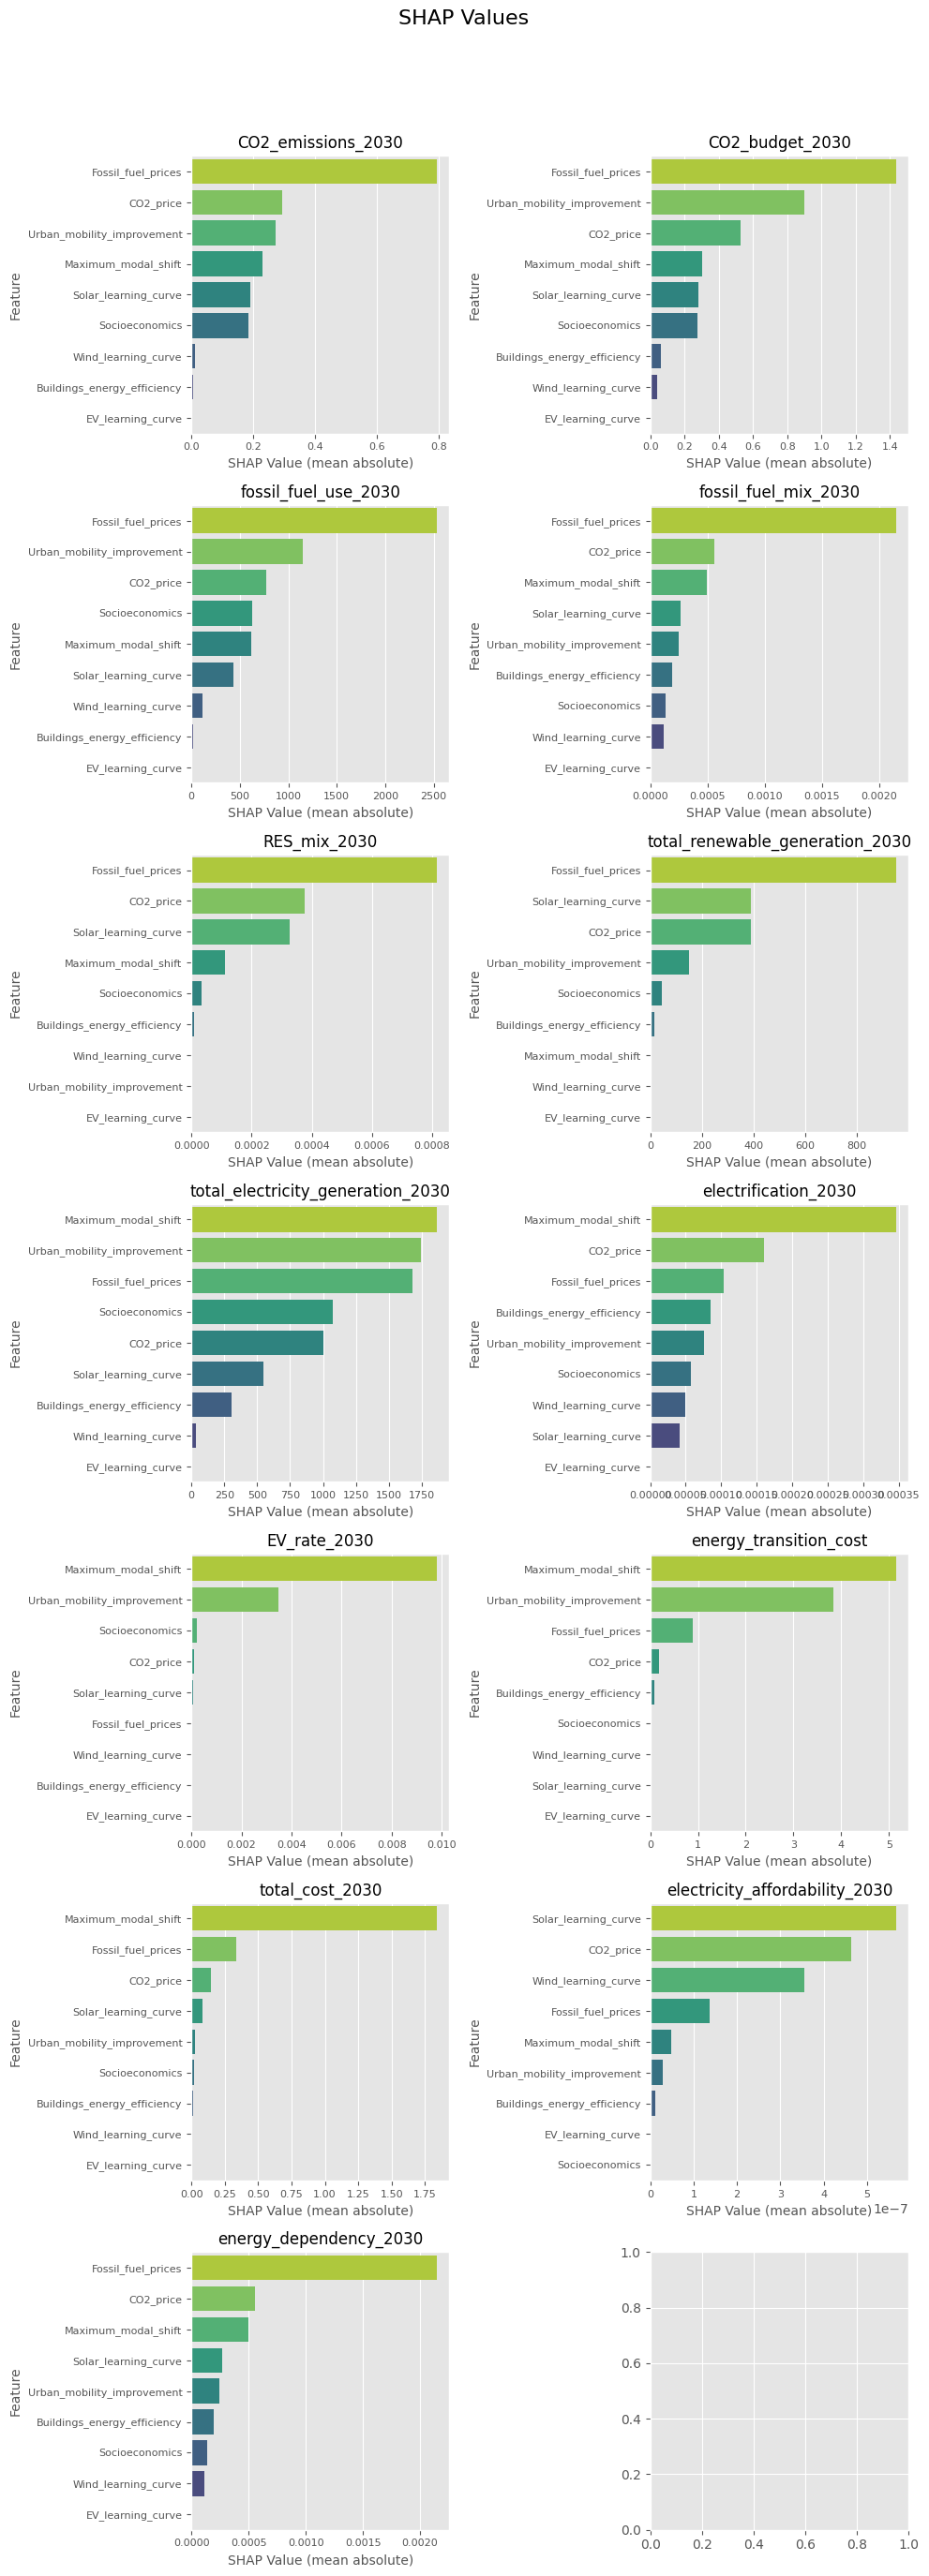

In [9]:
# Crear gráficos de barras para cada métrica
num_metrics = len(metrics)
num_cols = 2
num_rows = (num_metrics + 1) // num_cols  # Asegurar que se tenga suficientes filas

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows))

# Título único para toda la figura
fig.suptitle('SHAP Values', fontsize=16)

for i, metric in enumerate(metrics):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Obtener valores SHAP para la métrica actual y ordenar de mayor a menor
    shap_metric = shap_values[:, :, i]
    shap_mean = np.abs(shap_metric.values.mean(0))
    feature_names = X.columns.to_list()
    sorted_idx = np.argsort(shap_mean)
    
    # Crear el gráfico de barras utilizando Seaborn
    sns.barplot(y=np.array(feature_names)[sorted_idx], x=shap_mean[sorted_idx], hue=np.array(feature_names)[sorted_idx], ax=ax, palette='viridis')
    
    # Ajustar título y etiquetas del subplot
    ax.set_title(metric, fontsize=12)
    ax.set_xlabel('SHAP Value (mean absolute)', fontsize=10)
    ax.set_ylabel('Feature', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)
    ax.invert_yaxis()  # Invertir el eje y para que las características más importantes estén arriba

# Ajustar espaciado y mostrar gráfico
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Reducir el espacio entre los subplots y el título
plt.show()

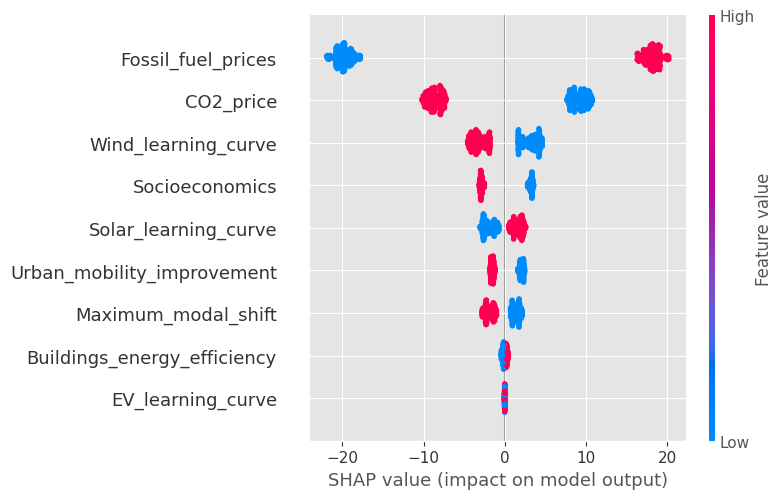

In [10]:
# Graficar los resultados (ejemplo para la primera métrica)
shap.summary_plot(shap_values[:, :, 0], X, title='SHAP Values for CO2 emissions in 2030')

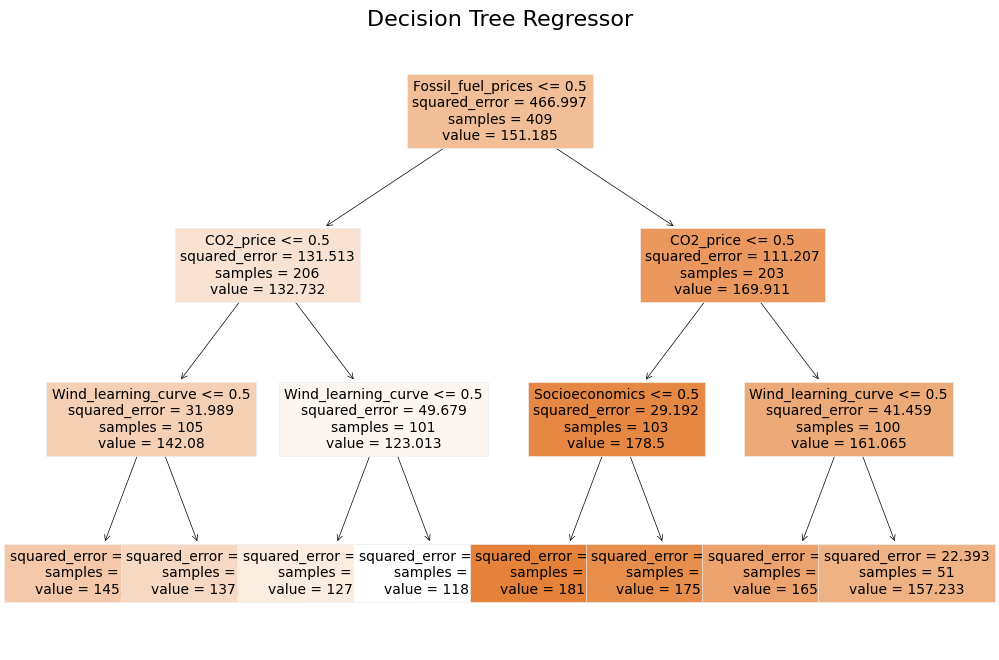

In [11]:
# CART
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y['CO2_emissions_2030'], test_size=0.2, random_state=0)

# Crear y entrenar el modelo de árbol de decisión con profundidad 3
model_tree = DecisionTreeRegressor(max_depth=3, random_state=0)
model_tree.fit(X_train, y_train)

# Visualizar el árbol utilizando plot_tree de scikit-learn
plt.figure(figsize=(12, 8))
plot_tree(model_tree, feature_names=features, filled=True, fontsize=10)
plt.title("Decision Tree Regressor", fontsize=16)
plt.show()
